## CNN
- Convolution filter가 이미지들의 feature를 찾아 다음 레이어로 보내는 특징
- 적은 수의 가중치로 이미지 처리 효율적으로할 수

#### backend 
- backend 서브 패키지를 통해 딥러닝 엔진 제어 가능
- 엔진에서 사용하는 시스템 파라미터값 참조 및 변경

In [1]:
import keras
from keras import models, layers
from keras import backend

Using TensorFlow backend.


In [2]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        
        self.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, (3,3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2,2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))
        
        self.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer='rmsprop',
                    metrics=['accuracy'])

#### 데이터 준비 
- 흑백이미지에는 채널 정보가 없으니 입력 데이터셋에 채널 정보를 추가해준다.
- backend 설정을 참고해서 first 혹은 last에 채널정보 추가

In [3]:
from keras import datasets

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows,img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [4]:
from keraspp.skeras import plot_acc, plot_loss
import matplotlib.pyplot as plt

def main():
    batch_size = 128
    epochs = 10
    
    data = DATA()
    model = CNN(data.input_shape, data.num_classes)
    
    history = model.fit(data.x_train, data.y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    
    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test Acc:', score[1])
    
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 36s 753us/step - loss: 0.2413 - acc: 0.9273 - val_loss: 0.0688 - val_acc: 0.9796
Epoch 2/10
48000/48000 [==============================] - 36s 749us/step - loss: 0.0887 - acc: 0.9741 - val_loss: 0.0516 - val_acc: 0.9847
Epoch 3/10
48000/48000 [==============================] - 36s 748us/step - loss: 0.0671 - acc: 0.9805 - val_loss: 0.0486 - val_acc: 0.9859
Epoch 4/10
48000/48000 [==============================] - 36s 748us/step - loss: 0.0548 - acc: 0.9843 - val_loss: 0.0463 - val_acc: 0.9879
Epoch 5/10
48000/48000 [==============================] - 36s 748us/step - loss: 0.0467 - acc: 0.9859 - val_loss: 0.0450 - val_acc: 0.9886
Epoch 6/10
48000/48000 [==============================] - 36s 747us/step - loss: 0.0448 - acc: 0.9866 - val_loss: 0.0396 - val_acc: 0.9886
Epoch 7/10
48000/48000 [==============================] - 36s 747us/step - loss: 0.0451 - acc: 0.9867 - val_loss: 0.

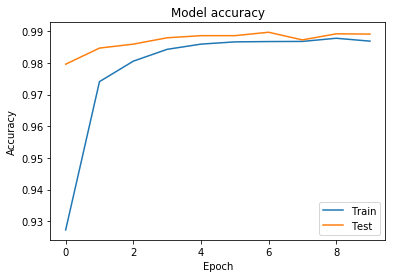

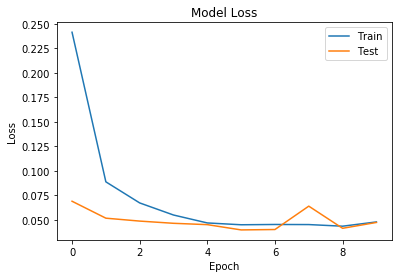

In [5]:
main()